<a href="https://colab.research.google.com/github/DavidWong123/WMU102-MAKERS/blob/MAKERS/WMU102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anemia Prediction with Machine Learning**

# Introduction

**Anemia** is a disorder in which your body's tissues don't get enough oxygen because you don't have enough healthy red blood cells. Anemia, commonly known as low haemoglobin, can leave you feeling exhausted and weak. Anemia comes in a variety of types, each with its unique aetiology. Anemia can be short-term or long-term, and it can be mild or severe. Anemia is caused by a variety of factors in the majority of cases.(Source: https://www.mayoclinic.org/diseases-conditions/anemia/symptoms-causes/syc-20351360) 

According to the National Health and Morbidity Survey 2019 (NHMS 2019), there are one in five or 21.3 per cent of Malaysians suffer from anaemia or low haemoglobin concentration in red blood cells.(Source: https://www.nst.com.my/news/nation/2021/07/711889one-5-malaysians-suffer-anaemia-says-dr-noor-hisham)

Data analytics is typically the person who is capable of performing the basic descriptive statistics, visualising data, and communicating data points for conclusions. They must have a fundamental comprehension of statistics, a perfect understanding of databases, the capacity to design new views, and the ability to visualise data. Data analytics may be considered of as the required level of data science.

Machine learning is the technique of extracting data, learning from it, and forecasting future trends for that topic using algorithms. Traditional machine learning software is statistical analysis and predictive analysis that is used to detect patterns and uncover hidden insights in data.

Both data analytics and machine learning are crucial in researching huge datasets to identify the hidden trends or information and forecast consequences. In this project, we developed a few anemia prediction models and compared their accuracy for improved anemia categorization based on a few external criteria such as gender, haemoglobin (HGB), Mean Cell Hemoglobin (MCH), 	Mean Corpuscular Hemoglobin Concentration (MCHC) and Mean Cell Volume	(MCV).

For this machine learning project, we choose a dataset from the medical domain, anemia. We build this machine learning model to predict whether a patient has anemia or not by interpreting the variables given.

Steps:

1.   Import Necessary Libraries
2.   Read In and Explore the Data
3.   Data Analysis
4.   Data Cleaning
5.   Data Visualization
6.   Choosing the Best Model
7.   Discussion
8.   Conclusion



# **1.  Import Necessary Libraries**


Firstly, we need to import necessary libraries such as pandas, numpy and seaborn.

In [ ]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Next, we upload the dataset: anemia.csv

It is time to read in our training and testing data using pd.read_csv and take a first look at the training data using the describe function, df(). Dataset: https://bit.ly/3tc4Xv5

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving anemia.csv to anemia.csv




# **2.   Read In and Explore the Data**





In [ ]:
df = pd.read_csv('anemia.csv')

In [ ]:
df

,SEX,HGB,MCH,MCHC,MCV,OUTCOME
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
...,...,...,...,...,...,...
1395,0,13.6,29.8,32.4,76.6,0
1396,1,13.0,26.0,31.4,82.8,1
1397,1,14.8,19.5,32.2,72.1,0
1398,0,14.3,19.2,30.9,94.8,0


Dataset: Dataset of anemia, taken from real data: https://www.kaggle.com/alisabrie/anemia

We define the variables given based on common sense and similar datasets of anemia.

The features above are used to predict whether a person is anemic or not:


*   Sex: Gender of patient (1=male, 0=female)
*   HGB (Hemoglobin): Hemoglobin is a protein in your red blood cells that carries oxygen from your lungs to the rest of your body. The level of normal haemoglobin should be between 11.0 - 16.0 g/dL.
*   MCH (Mean Cell Hemoglobin): The average mass of hemoglobin (Hb) per red blood cell (RBC) in a sample of blood. The level of normal MCH  should be between 27.0 - 32.0 pg.
*   MCHC (Mean Corpuscular Hemoglobin Concentration): Measuring of the concentration of hemoglobin in a given volume of packed red blood cell.The level of normal MCHC should be between 31.0 - 37.0 g/dL.
*   MCV (Mean Cell Volume): The measurement of red blood cell size. The level of normal MCV should be between 80.0 - 101.0 fL.
*   Outcome: Class variable (0 if non-anemic, 1 if anemic)

In [ ]:
df.describe(include="all")

,SEX,HGB,MCH,MCHC,MCV,OUTCOME
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,0.523571,13.416071,22.918929,30.259571,85.508857,0.434286
std,0.499623,1.977733,3.973307,1.399768,9.631667,0.495840
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.475000,29.100000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.250000,0.000000
75%,1.000000,15.025000,26.300000,31.400000,94.000000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


There are a total of 1400 patients in our dataset.

1. **HGB (Hemoglobin)**:  A low hemoglobin level which below 11.0g/dL is referred to as anemia or low red blood count whereas the high hemoglobin level which hogher than 16.0g/dL. According to the dataset, all the patient are at the normal range of haemoglobin values. 
2. **MCH (Mean Cell Hemoglobin)**: The MCH value calculated below 27.0 pg is considered low MCH which means there is a low amount of hemoglobin present per red blood cell whereas the MCH value calculated above 32.0 pg is considered high MCH which means there is a larger amount of hemoglobin present per red blood cell. According to the dataset, at least 25% of the patients have MCH level of less than 27.0 pg. 
3.   **MCHC (Mean Corpuscular Hemoglobin Concentration)**: When the MCHC is low which below than 31.0 g/dL, it means the red blood cells do not have enough hemoglobin whereas when the MCHC is high which is higher than 37.0 g/dL, it means the hemoglobin is more concentrated than usual and may occur in a few ways. According to the dataset, more than 50% of the patients have lower MCHC level which is less than 31.0 g/dL.
4.   **MCV (Mean Cell Volume)**: If the patient has a lower MCV level which below 80.0 fL, this suggests they have microcytic anemia. Microcytic anemia is a type of anemia in which red blood cells are smaller than usual. If the patient has a higher MCV level which below 101.0 fL, this suggests they have macrocytic anemia which their red blood cells are larger than usual. According to the dataset, about 25% of patients have lower MCV level which is less than 80.0 fL.

All the dataset references level are according to the guidelines of the World Health Organization (WHO), from https://data.mendeley.com/datasets/dy9mfjchm7/1



**Note!!**

This is a slightly imbalance dataset since the mean for 'Outcome' is 0.434, which is skewed towards not anemic. This factor has to be taken seriously in the following data analysis.

(For more accuracy, oversampling or undersampling of data is suggested.)



# **3.   Data Analysis**



We are going to consider the features in the dataset and how complete they are.

Numerical features : Sex (Discrete), HGB (Continuous), MCH (Continuous), MCHC (Continuous), MCV (Continuous). 

What are the data types for each feature?


*   Sex : int64
*   HGB : float64
*   MCH : float64
*   MCHC : float64
*   MCV : float64


We have one int64 and four float64, discrete variables are usually of the int type while continuous variables are usually of float type.


In [ ]:
print(df.columns)

Index(['SEX', 'HGB', 'MCH', 'MCHC', 'MCV', 'OUTCOME'], dtype='object')


In [ ]:
#check for any other unusable values
print(pd.isnull(df).sum())

SEX        0
HGB        0
MCH        0
MCHC       0
MCV        0
OUTCOME    0
dtype: int64


At first glance, the dataset is complete and no cleaning process is necessary. Furthermore, when we look back to the previous table and found that the minimum value of all the features except "Sex" are having zero value. 

Therefore, no further drop of dataset is needed. 




# **4.   Data Cleaning**


Since there are no unreasonable data present in the dataset, no data cleaning will be done.

In [ ]:
df.describe(include="all")

,SEX,HGB,MCH,MCHC,MCV,OUTCOME
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,0.523571,13.416071,22.918929,30.259571,85.508857,0.434286
std,0.499623,1.977733,3.973307,1.399768,9.631667,0.495840
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.475000,29.100000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.250000,0.000000
75%,1.000000,15.025000,26.300000,31.400000,94.000000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000




# **5.   Data Visualization**

Some predictions are made :

*   The female patients have higher risk of getting anemia.
*   The patients with lower haemoglobin level have higher chance of getting anemia.
*   The patients with Mean Cell Haemoglobin level out of the normal range have a higher risk of developing anemia.
*   The patients with Mean Corpuscular Hemoglobin Concentration out of normal level are more likely predicted to have anemia.
*   The patients with Mean Cell Volume level out of normal range are more likely to have anemia.






/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

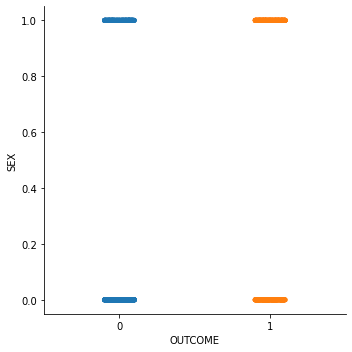

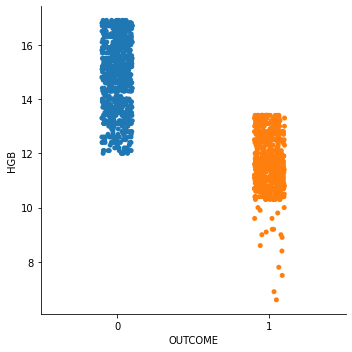

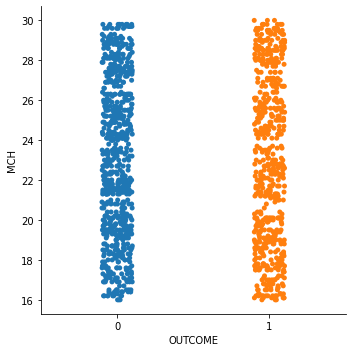

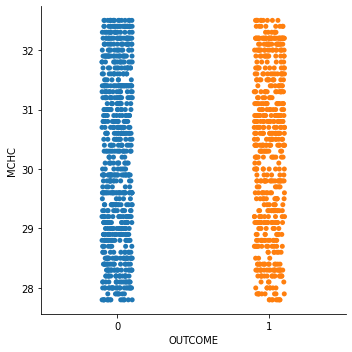

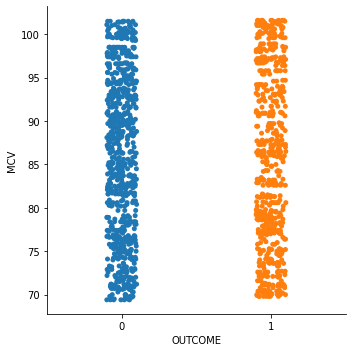

In [ ]:
#This is used to visualize our data and to check whether our predictions are accurate.
for col in df.columns:
  if col != "OUTCOME":
      sns.catplot("OUTCOME", col, 
               data = df)

**Sex:**
From the graph, the number of dots for both outcomes are almost the same. This shows that anemia will not be affected by gender. The prediction is false, which might due to more dataset obtained from male patients, as the female population are more.

**HGB (Hemoglobin):**
From the graph, the number of orange dots are located at a lower range, which indicated that the anemic patients were havng a lower level of hemoglobin. The prediction is true. 


**MCH (Mean Cell Hemoglobin):**
From the graph, the number of dots for both colour out of normal range (27.0 - 32.0 pg) are more than the dots within the normal range. This is aligned with the prediction. However, the number of blue dots are more than orange dots at the abnormal range. This might indicates that MCH is not a dominant factor that contributed to anemia. The prediction is partially true. 

**MCHC (Mean Corpuscular Hemoglobin Concentration):**
From the graph, the number of dots for both colour out of normal range (31.0 - 37.0 g/dL) are more than the dots within the normal range. This is aligned with the prediction. However, the number of blue dots are more than orange dots at the abnormal range. This might indicates that MCHC is not a dominant factor that contributed to anemia. The prediction is partially true.

**MCV (Mean Cell Volume):**
From the graph, the number of dots for both colour out of normal range (80.0 - 101.0 fL) are more than the dots within the normal range. This is aligned with the prediction. However, the number of orange dots are just slightly more than blue dots at the abnormal range. This might indicates that MCV is not a dominant factor that contributed to anemia. The prediction is partially true.



We found some  difference between the results here with assumption made before data cleaning. 

MCH, MCHC and MCV is not a good indicator of anemia as abnormal level. There are still other factors that might also contribute to anemia. Sex is also one of the features predicted wrongly. This might due to dataset obtained with more male patients which inaligned with the actual human populations. However, this does not affect our previous assumption as hemoglobin level are seems to be a dominant factor that causes anemia. So, we can consider that nothing is affected.

After consideration, we decided not to make changes on data cleaning.



# **6.   Choosing the Best Model**








**Testing Different Models**

Supervised learning uses a training set to teach models to yield the desired output. Classification uses an algorithm to accurately assign test data into specific categories (source: https://www.ibm.com/cloud/learn/supervised-learning).

We will be testing the following models with our training data:
* KNN (k-Nearest Neighbors)
* Decision Tree Classifier
* Gaussian Naive Bayes
* Random Forest Classifier
* Support Vector Machines


In [ ]:
X= df.drop(['OUTCOME'],axis=1)

In [ ]:
X

,SEX,HGB,MCH,MCHC,MCV
0,1,14.9,22.7,29.1,83.7
1,0,15.9,25.4,28.3,72.0
2,0,9.0,21.5,29.6,71.2
3,0,14.9,16.0,31.4,87.5
4,1,14.7,22.0,28.2,99.5
...,...,...,...,...,...
1395,0,13.6,29.8,32.4,76.6
1396,1,13.0,26.0,31.4,82.8
1397,1,14.8,19.5,32.2,72.1
1398,0,14.3,19.2,30.9,94.8


In [ ]:
y=df['OUTCOME']

In [ ]:
y

0       0
1       0
2       1
3       0
4       0
       ..
1395    0
1396    1
1397    0
1398    0
1399    0
Name: OUTCOME, Length: 1400, dtype: int64

In [ ]:
#Import Module
# We create our training and testing datasets with a train_test_split method
# At the moment train set size will be 70% of the data and test set size 30%
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=122)

In [ ]:
train_X.shape, test_X.shape

((979, 5), (420, 5))

In [ ]:
train_X

,SEX,HGB,MCH,MCHC,MCV
4,1,14.7,22.0,28.2,99.5
550,0,14.4,29.8,31.6,92.4
697,0,15.5,17.4,28.5,78.9
1084,0,16.4,27.2,31.4,70.6
34,0,11.9,29.5,32.2,87.8
...,...,...,...,...,...
187,0,13.2,27.8,30.6,81.4
876,0,10.7,22.8,30.5,81.3
1296,1,14.6,24.1,30.7,98.1
830,1,14.3,21.4,31.2,88.5


In [ ]:
test_X

,SEX,HGB,MCH,MCHC,MCV
1312,1,16.1,26.1,31.4,93.7
722,1,10.6,29.5,30.4,85.0
1267,0,15.0,27.5,28.5,80.3
1128,1,14.6,25.5,31.8,83.5
333,1,12.9,27.4,28.2,78.8
...,...,...,...,...,...
539,0,10.4,27.1,29.8,75.2
356,0,13.4,27.9,29.0,84.4
676,0,10.3,20.1,28.2,86.3
95,0,13.7,19.5,31.7,77.1


In [ ]:
train_y.shape, test_y.shape

((979,), (420,))

In [ ]:
train_y

4       0
550     0
697     0
1084    0
34      1
       ..
187     0
876     1
1296    0
830     0
1356    0
Name: OUTCOME, Length: 979, dtype: int64

In [ ]:
test_y

1312    0
722     1
1267    0
1128    0
333     1
       ..
539     1
356     0
676     1
95      0
672     0
Name: OUTCOME, Length: 420, dtype: int64

#**KNN (k-Nearest Neighbors)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics

#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_X, train_y)
    pred_1 = knn.predict(test_X)
    scores[k] = metrics.accuracy_score(test_y, pred_1)
    scores_list.append(metrics.accuracy_score(test_y, pred_1))

In [ ]:
print("-------------------------------")
print("k-value |     Test Accuracy")
print("-------------------------------")
for a,b in zip(k_range, scores_list):
  print(a, "\t|  ", b)
print("-------------------------------")

-------------------------------
k-value |     Test Accuracy
-------------------------------
1 	|   0.9714285714285714
2 	|   0.9380952380952381
3 	|   0.9166666666666666
4 	|   0.8738095238095238
5 	|   0.8904761904761904
6 	|   0.888095238095238
7 	|   0.9142857142857143
8 	|   0.9119047619047619
9 	|   0.9071428571428571
10 	|   0.9119047619047619
11 	|   0.9166666666666666
12 	|   0.9023809523809524
13 	|   0.9119047619047619
14 	|   0.9071428571428571
15 	|   0.9047619047619048
16 	|   0.8928571428571429
17 	|   0.8904761904761904
18 	|   0.8952380952380953
19 	|   0.8928571428571429
20 	|   0.8952380952380953
21 	|   0.8952380952380953
22 	|   0.8976190476190476
23 	|   0.8833333333333333
24 	|   0.8904761904761904
25 	|   0.8857142857142857
-------------------------------


Text(0, 0.5, 'Testing Accuracy')

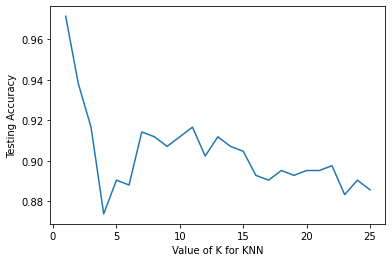

In [ ]:
#We plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

From the result, we choose **k = 3** since we opt to choose odd number with highest accuracy while excluding 1. 

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# We can ask the model to directly calculate the accuracy
knn.score(train_X, train_y)

0.9744637385086823

In [ ]:
knn.score(test_X,test_y)

0.9166666666666666

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# We can also let the model predict the values for the test set
pred_1 = knn.predict(test_X)
print(pred_1[:10])

[0 0 0 0 1 0 1 0 1 1]


In [ ]:
# And calculate the accuracy
print("Accuracy:", accuracy_score(test_y, pred_1))

Accuracy: 0.9166666666666666


In [ ]:
# Report for other classification measures
print("Classification report:")
print(classification_report(test_y, pred_1))

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       231
           1       0.93      0.88      0.90       189

    accuracy                           0.92       420
   macro avg       0.92      0.91      0.92       420
weighted avg       0.92      0.92      0.92       420



**Note:** 
* The **recall** means "how many of this class you find over the whole number of element of this class"
* The **precision** will be "how many are correctly classified among that class"
* The **f1-score** is the harmonic mean between precision & recall
* The **support** is the number of occurence of the given class in your dataset 

In [ ]:
# And the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(test_y, pred_1))

Confusion matrix:
[[219  12]
 [ 23 166]]


KNN is not a god model for the prediction. It is acceptable to give wrong prediction of labelling a non-diabetic person diabetic, however, labelling a diabeic person as non-diabetic can have serious consequences. This may be due to an imbalanced dataset skewing towards non-diabetic.

Text(0.5, 257.44, 'Predicted label')

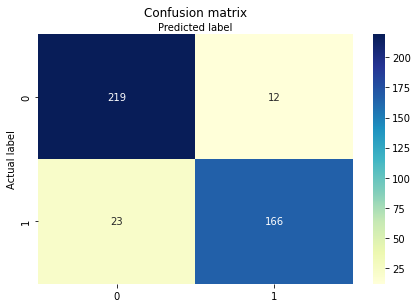

In [ ]:
cnf_matrix = metrics.confusion_matrix(test_y, pred_1)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Note:**
A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class.

[[TN  FP]

[FN TP]]

* TP: True postive
*TN: True negative
*FP: False positive
*FN: False Negative


#**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
from sklearn import metrics

In [ ]:
dtc=DecisionTreeClassifier()

In [ ]:
dtc=dtc.fit(train_X,train_y)

In [ ]:
pred_2=dtc.predict(test_X)

In [ ]:
print(pred_2[:10])

[0 1 0 0 1 0 1 0 1 1]


In [ ]:
print("Accuracy:", accuracy_score(test_y, pred_2))

Accuracy: 1.0


In [ ]:
# Report for other classification measures
print("Classification report:")
print(classification_report(test_y, pred_2))

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       231
           1       1.00      1.00      1.00       189

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420



In [ ]:
# And the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(test_y, pred_2))

Confusion matrix:
[[231   0]
 [  0 189]]


Text(0.5, 257.44, 'Predicted label')

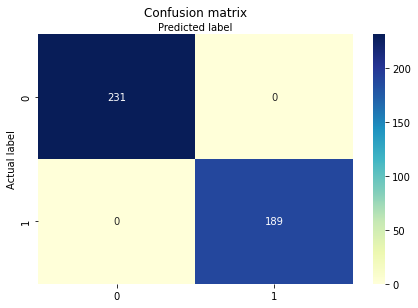

In [ ]:
cnf_matrix = metrics.confusion_matrix(test_y, pred_2)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#**Gaussian Naive-Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb=GaussianNB()

In [ ]:
nb.fit(train_X,train_y)

GaussianNB()

In [ ]:
pred_3=nb.predict(test_X)

In [ ]:
print(pred_3[:10])

[0 1 0 0 1 0 1 0 1 1]


In [ ]:
print("Accuracy:", accuracy_score(test_y, pred_3))

Accuracy: 0.95


In [ ]:
# Report for other classification measures
print("Classification report:")
print(classification_report(test_y, pred_3))

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       231
           1       0.94      0.95      0.94       189

    accuracy                           0.95       420
   macro avg       0.95      0.95      0.95       420
weighted avg       0.95      0.95      0.95       420



In [ ]:
# And the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(test_y, pred_3))

Confusion matrix:
[[220  11]
 [ 10 179]]


Text(0.5, 257.44, 'Predicted label')

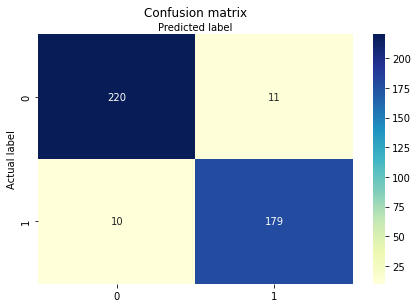

In [ ]:
cnf_matrix = metrics.confusion_matrix(test_y, pred_3)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#**Random Forest Classifier**


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ran=RandomForestClassifier(n_estimators=100)

In [ ]:
ran.fit(train_X,train_y)

RandomForestClassifier()

In [ ]:
pred_4=ran.predict(test_X)

In [ ]:
print(pred_4[:10])

[0 1 0 0 1 0 1 0 1 1]


In [ ]:
print("Accuracy:", accuracy_score(test_y, pred_4))

Accuracy: 1.0


In [ ]:
# Report for other classification measures
print("Classification report:")
print(classification_report(test_y, pred_4))

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       231
           1       1.00      1.00      1.00       189

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420



In [ ]:
# And the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(test_y, pred_4))

Confusion matrix:
[[231   0]
 [  0 189]]


Text(0.5, 257.44, 'Predicted label')

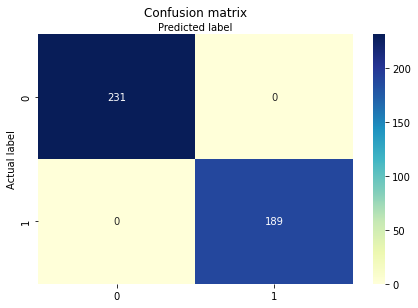

In [ ]:
cnf_matrix = metrics.confusion_matrix(test_y, pred_4)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **Support Vector Machines**

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(train_X,train_y)

SVC(kernel='linear')

In [ ]:
pred_5 = svclassifier.predict(test_X)

In [ ]:
print(pred_5[:10])

[0 1 0 0 1 0 1 0 1 1]


In [ ]:
print("Accuracy:", accuracy_score(test_y, pred_5))

Accuracy: 0.9880952380952381


In [ ]:
# Report for other classification measures
print("Classification report:")
print(classification_report(test_y, pred_5))

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       231
           1       0.98      0.99      0.99       189

    accuracy                           0.99       420
   macro avg       0.99      0.99      0.99       420
weighted avg       0.99      0.99      0.99       420



In [ ]:
# And the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(test_y, pred_5))

Confusion matrix:
[[227   4]
 [  1 188]]


Text(0.5, 257.44, 'Predicted label')

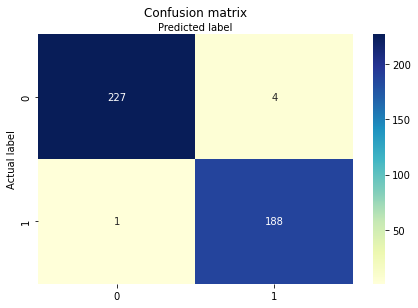

In [ ]:
cnf_matrix = metrics.confusion_matrix(test_y, pred_5)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **7. Discussion**

To compare the accuracy of four different models:

In [ ]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Decision Tree','Naive Bayes', 'Random Forest','Support Vector Machines'],
    'Accuracy': [accuracy_score(test_y, pred_1), accuracy_score(test_y, pred_2), accuracy_score(test_y, pred_3), accuracy_score(test_y, pred_4), accuracy_score(test_y, pred_5)]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,Decision Tree,1.000000
3,Random Forest,1.000000
4,Support Vector Machines,0.988095
2,Naive Bayes,0.950000
0,KNN,0.916667


The **K-nearest neighbour (KNN)** technique is one of the earliest and simplest classification algorithms currently. It might be thought a simpler version of a Naive Bayes (NB) classifier. Unlike the NB technique, the KNN algorithm does not required to consider probability values. There are several ways KNN works. The first is to determine how far away a given query is from every single example in the data set. Then, it selects as many as K instances that are the closest distance from the query (in the case of regression). There is a total of k neighbours, and the new data point is assigned to the category where there are the most neighbours.

**Support Vector Machine** is linear classification and regression problems can be solved which are linear models. Linear and non-linear problems can be solved using this tool. SVM is based on a straightforward premise: As a result of this algorithm, the data is divided into distinct classes.

**Decision Tree Classification** is the most effective classifier. Decision tree learning is one of the predictive modelling methods used in statistics, data mining and machine learning. It utilizes a decision tree (as a predictive model) to move from observations about an item (represented in the branches) to conclusions about the item's aim value (shown in the leaves) (represented in the leaves). Tree models where the aim variable can take a discrete set of values are called classification trees; in these tree structures, leaves provide class labels and branches represent conjunctions of features that lead to those class labels. Decision trees will be reduced to rules, with any inconsistencies resolved and the new set of rules combined. Using a data set as a test case, cross validation experiments show that this approach can be used to analyse large datasets.

**Random Forest** is regarded as an extremely accurate and reliable method because of the large number of decision trees involved. Random forests can also deal with missing data. The random forest's output for classification tasks is the class selected by the majority of trees. The mean or average prediction of the individual trees is returned for regression tasks. The overfitting tendency of decision trees to their training data can be corrected by using random decision forests. However, using median values instead of continuous variables or computing the proximity-weighted average of missing data are two options. The overfitting tendency of decision trees to their training data can be corrected by using random decision forests. In most cases, random forests are better than decision trees.

**Naive Bayes Classifier** works on the basis of Bayes’ Theorem. naive Bayesian classifier family is a group of straightforward "probabilistic classifiers" based on Bayes' theorem and nave assumptions about feature independence (see Bayes classifier). When used with kernel density estimation, they are among the simplest Bayesian network models, but their accuracy is significantly improved. The basic premise is that all features are independent of one another and have an equal impact on the final result; they are all equally significant. But these assumptions are not always valid in real life (disadvantage of Naive Bayes). It is a probabilistic classifier model whose crux is the Bayes’ theorem. From our predictions above, factors such as 'Insulin' may not be good indicators of diabetes, therefore there is no wonder that the NB technique delivers lesser accuracy as it considers the impact of each variable equally.

The dataset is slightly imbalanced as mean for outcome is 0.434 which is slightly leaning towards no anemia. Therefore, Support Vector Machines, KNN and Naive Bayes performed poorly when compared to Random Forest and DT.

DT and Random Forest is better (more accurate in percentages) when compared to other models. However, among these two, Random Forest has the highest accuracy between all the models. Random Forest is suitable for situations when we have a large dataset, as the use of multiple trees in the random forest reduces the risk of overfitting. It has better accuracy than DT because Random Forest can correct for the problem of DT which tends to overfit easily.

##**Limitations**
Due to the constraint of the dataset, we are unable to predict the types of anemia.
Oversampling or undersampling of data had not been carried out.

##**Impacts**
Machine Learning is critical in dealing with large amounts of data. Machine learning may aid in the introduction of wearables, smartphones, and other gadgets that are valuable in monitoring and tracking a patient's state by offering an accurate prediction model. With Machine Learning, we don’t need to babysit our project every step of the way. Since it means giving machines the ability to learn, it lets them make predictions and also improve the algorithms on their own. As Machine Learning algorithms gain experience, they keep improving in accuracy and efficiency. This lets them make better decisions. Say you need to make a weather forecast model. As the amount of data you have keeps growing, your algorithms learn to make more accurate predictions faster. Future research might be done to turn it into an early diagnosis tool or perhaps a meal recommendation tool, as well as an AI health advisor. Future study should focus on improving the dataset and estimating the likelihood of a non-diabetic person developing diabetes in the next years. 




# **8. Conclusion**

Ultimately, anemia is a growing health concern in today's environment that must not be overlooked. Data analytics and machine learning can be used to uncover hidden trends or information in databases, allowing for more accurate forecasting. A few classification algorithms are researched and their accuracy is compared in this project, with Random Forest Classifier and Decision Tree having the best accuracy (1.000), Support Vector Machine (0.993), Gaussian Naive Bayes (0.943), and k-nearest Neighbour having the lowest accuracy (0.893). The Random Forest Classifier is the best model for this classification problem, according to our findings. Future study should focus on improving the dataset and forecasting the likelihood of a non-anemic person developing anaemia in the next years.